## SIMPLE LINEAR REGRESSION

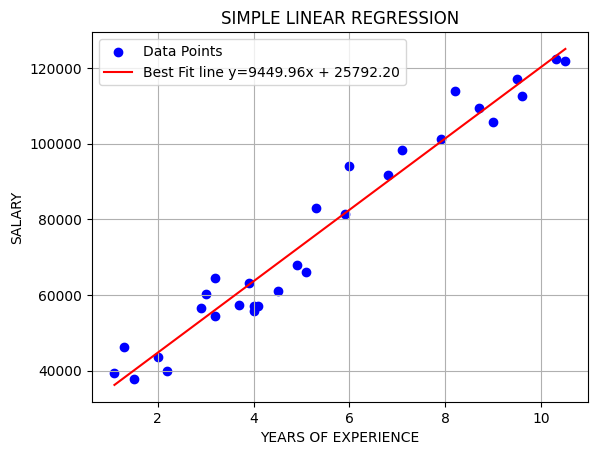

Enter years of exp to predict Salary 1


Predicted Salary for 1.0 years of exp :35242.16


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('data1.csv')
X=df['YearsExperience']
Y=df['Salary']
X_mean=X.mean()
Y_mean=Y.mean()
num=((X-X_mean)*(Y-Y_mean)).sum()
den=((X-X_mean)**2).sum()
slope=num/den
intercept=Y_mean-slope*X_mean
Y_pred=slope*X+intercept
r_squared=1-(((Y-Y_pred)**2).sum()/((Y-Y_mean)**2).sum())
plt.scatter(X,Y,color='blue',label='Data Points')
plt.plot(X,Y_pred,label=f'Best Fit line y={slope:.2f}x + {intercept:.2f}',color='red')
plt.xlabel('YEARS OF EXPERIENCE')
plt.ylabel('SALARY')
plt.title('SIMPLE LINEAR REGRESSION')
plt.legend()
plt.grid(True)
plt.show()
x_input=float(input('Enter years of exp to predict Salary'))
y_out=slope*x_input+intercept
print(f"Predicted Salary for {x_input} years of exp :{y_out:.2f}")

## MULTIPLE REGRESSION

Regression Equation: Price = 49293.19 + 132.33 * Size + 17578.53 * Bedrooms


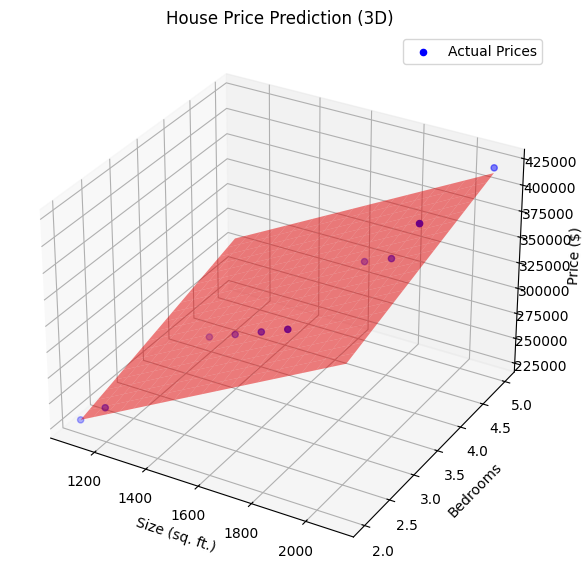

Prediction


Enter house size (sq. ft.):  2000
Enter number of bedrooms:  5


Predicted Price for 2000.0 sq. ft. and 5 bedrooms: $401845.55


In [12]:
## import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('house_data.csv')
X1=df['Size']
X2=df['Bedrooms']
Y=df['Price']
n=len(X1)
A=np.array([
    [n,X1.sum(),X2.sum()],
    [X1.sum(),(X1**2).sum(),(X1*X2).sum()],
    [X2.sum(),(X1*X2).sum(),(X2**2).sum()]
])
B=np.array([Y.sum(),(X1*Y).sum(),(X2*Y).sum()])
sol=np.linalg.solve(A,B)
b0,b1,b2=sol
print(f"Regression Equation: Price = {b0:.2f} + {b1:.2f} * Size + {b2:.2f} * Bedrooms")

from mpl_toolkits.mplot3d import Axes3D ##imp
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,Y,color='blue',label='Actual Prices')
X1_range=np.linspace(X1.min(),X1.max(),20)
X2_range=np.linspace(X2.min(),X2.max(),20)
X1_grid,X2_grid=np.meshgrid(X1_range,X2_range)
Y_pred_grid=b0+b1*X1_grid+b2*X2_grid
ax.plot_surface(X1_grid,X2_grid,Y_pred_grid,color='red',alpha=0.5)
ax.set_xlabel("Size (sq. ft.)")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price ($)")
ax.set_title("House Price Prediction (3D)")
plt.legend()
plt.show()
print("Prediction")
size= float(input("Enter house size (sq. ft.): "))
bedrooms= int(input("Enter number of bedrooms: "))
predicted_price= b0 + b1 * size + b2 * bedrooms
print(f"Predicted Price for {size} sq. ft. and {bedrooms} bedrooms: ${predicted_price:.2f}")





## KNN

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('iris.csv')
data=df[['SepalLength','SepalWidth']]
points=np.array([5.2,3.1])
distances=np.sqrt(((data-points)**2).sum(axis=1))
df["Distance"]=distances
print(f'Given Points:{points}')
k=int(input('Enter k(Number of neighbors) to predict class'))
k_nearest=df.nsmallest(k,"Distance")["Species"]
prediction=k_nearest.mode()[0]
print(f'Predicted class:{prediction}')
                

Given Points:[5.2 3.1]


Enter k(Number of neighbors) to predict class 2


Predicted class:Setosa


## K-MEANS


----Iteration-1----
Assignments:
A1    C3
A2    C1
A3    C2
A4    C3
A5    C2
A6    C2
A7    C1
A8    C3
dtype: object

Updated Centroids:
                 x         y
clusters                    
C1        1.500000  3.500000
C2        7.000000  4.333333
C3        3.666667  9.000000

----Iteration-2----
Assignments:
A1    C3
A2    C1
A3    C2
A4    C3
A5    C2
A6    C2
A7    C1
A8    C3
dtype: object

Updated Centroids:
                 x         y
clusters                    
C1        1.500000  3.500000
C2        7.000000  4.333333
C3        3.666667  9.000000

Converged.

Final Cluster Centers:
                 x         y
clusters                    
C1        1.500000  3.500000
C2        7.000000  4.333333
C3        3.666667  9.000000

Final Assignments:
A1    C3
A2    C1
A3    C2
A4    C3
A5    C2
A6    C2
A7    C1
A8    C3
dtype: object


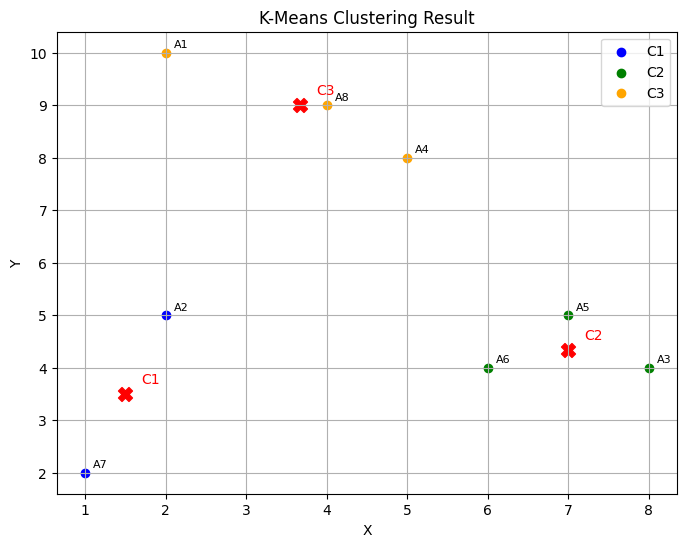

In [6]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
k=3 ##number of clusters
index=[f"A{i}" for i  in range(1,9)]
data=pd.DataFrame({
    'x':[2, 2, 8, 5, 7, 6, 1, 4],
    "y": [10, 5, 4, 8, 5, 4, 2, 9]
},index=index)
clusters=data.sample(n=k,random_state=42)
clusters.index=[f"C{i}" for i in range(1,k+1)]
iteration=1
while True:
    print(f'\n----Iteration-{iteration}----')
    distance=pd.DataFrame(index=data.index,columns=clusters.index,dtype=float)
    for j in clusters.index:
        distance[j]=np.sqrt(((data[["x","y"]]-clusters.loc[j])**2).sum(axis=1))
    assignments=distance.idxmin(axis=1)
    data["clusters"]=assignments
    print("Assignments:")
    print(assignments)
    newClusters = data.groupby("clusters")[["x", "y"]].mean()
    print("\nUpdated Centroids:")
    print(newClusters)
    if newClusters.equals(clusters):
        print("\nConverged.")
        break
    clusters=newClusters
    iteration+=1
print(f"\nFinal Cluster Centers:\n{clusters}")
print(f"\nFinal Assignments:\n{assignments}") 
colors = {"C1": "blue", "C2": "green", "C3": "orange"}

plt.figure(figsize=(8, 6))
for cluster, color in colors.items():
    pts = data[data["clusters"] == cluster]
    plt.scatter(pts["x"], pts["y"], c=color, label=cluster)
    for i in pts.index:
        plt.text(pts.loc[i, "x"] + 0.1, pts.loc[i, "y"] + 0.1, i, fontsize=8)
    cx, cy = clusters.loc[cluster, ["x", "y"]]
    plt.scatter(cx, cy, c="red", marker="X", s=100)
    plt.text(cx + 0.2, cy + 0.2, cluster, color="red", fontsize=10)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Means Clustering Result")
plt.legend()
plt.grid(True)
plt.show()

    

## NAVIE-BAYS

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
df = pd.read_csv('weather.csv')
encoders={}
for col in df.columns:
    encoders[col]=LabelEncoder()
    df[col]=encoders[col].fit_transform(df[col])
x=df.drop(columns=["Play"])
y=df["Play"]
model=CategoricalNB()
model.fit(x,y)
y_pred=model.predict(x)
accuracy=accuracy_score(y,y_pred)
sample_dict = {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}
sample_df = pd.DataFrame([sample_dict])
for col in sample_df.columns:
        sample_df[col]=encoders[col].transform(sample_df[col])
predict=model.predict(sample_df)   
predict_label=encoders["Play"].inverse_transform(predict)[0]
probabilities=model.predict_proba(sample_df)[0]
print(f"Sample: {sample_dict}\n")
print(f"Posterior probability for 'Yes': {probabilities[1]:.3f}")
print(f"Posterior probability for 'No' : {probabilities[0]:.3f}")
print(f"\nPrediction: Play = {predict_label}")
print(f"\nTraining Accuracy: {accuracy * 100:.2f}%")


    


Sample: {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}

Posterior probability for 'Yes': 0.280
Posterior probability for 'No' : 0.720

Prediction: Play = No

Training Accuracy: 92.86%


## Decision Tree

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv("weather.csv")  # or use the hardcoded DataFrame if needed

# Encode categorical features
le = LabelEncoder()
X = data.drop("Play", axis=1).apply(le.fit_transform)
y = le.fit_transform(data["Play"])

# Train decision tree
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X, y)

# Export the tree
feature_names = data.columns[:-1]
tree_rules = export_text(clf, feature_names=list(feature_names))
print(tree_rules)


|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Temperature <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  1.00
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1

